# Eye-Tracking Plotting Overview

Purpose
- Visualize key eye-tracking features per session as quality and behavior overview.

Inputs
- `./preprocessed/eye_tracking_features.csv` generated by `06_EyeEvents.ipynb`.

Quality Filters (applied before plotting)
- `roi_coverage >= 20` (% of gaze points inside text ROI)
- `pupil_size_mean >= 100` (remove blinks / tracking dropouts)
- `fixation_duration_mean <= 1.5 s` (cap unrealistic long fixations)

Outputs
- 2×3 boxplot grid by `session_id` for:
  - ROI Coverage (%), Number of Fixations, Mean Fixation Duration (s)
  - Number of Saccades, Mean Saccade Amplitude (px), Mean Pupil Size
- Saved to `./figures/eye_tracking_features_by_session_filtered.png`
- Displayed inline in notebook

Notes
- You can adjust filter thresholds in the parameters cell where `MIN_ROI`, `MIN_PUPIL`, and `MAX_FIX_DUR` are defined.
- For condition-wise plots (e.g., `alignment`), we can extend this notebook with additional facets.

Citation
- Based on analysis workflow adapted from: Chiossi, F., Mayer, S., & Ou, C. (2024). OSF: https://osf.io/fncj4/ (GPL-3.0).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path = "./preprocessed/eye_tracking_features.csv"

df = pd.read_csv(file_path)
print("Loaded:", file_path, "shape=", df.shape)


Loaded: ./preprocessed/eye_tracking_features.csv shape= (45, 18)


In [3]:
print(sorted(df.columns.tolist()))
print("Sessions:", sorted(df['session_id'].unique().tolist()))

# Quality filters
MIN_ROI = 20.0         # % of gaze points inside ROI
MIN_PUPIL = 100.0      # raw pupil size threshold to remove blinks/dropouts
MAX_FIX_DUR = 1.5      # seconds; cap unrealistic long fixations

filtered = (
    df
      .query("roi_coverage >= @MIN_ROI")
      .query("pupil_size_mean >= @MIN_PUPIL")
      .query("fixation_duration_mean <= @MAX_FIX_DUR")
      .copy()
)
print(f"Filtered from {len(df)} to {len(filtered)} trials")


['alignment', 'duration', 'fixation_count', 'fixation_dispersion_x', 'fixation_dispersion_y', 'fixation_duration_mean', 'fixation_duration_total', 'pupil_size_mean', 'pupil_size_std', 'roi_coverage', 'saccade_amplitude_max', 'saccade_amplitude_mean', 'saccade_count', 'saccade_velocity_mean', 'session_id', 'time_to_first_fixation', 'trial_idx', 'trial_n']
Sessions: [0, 1, 4]
Filtered from 45 to 29 trials


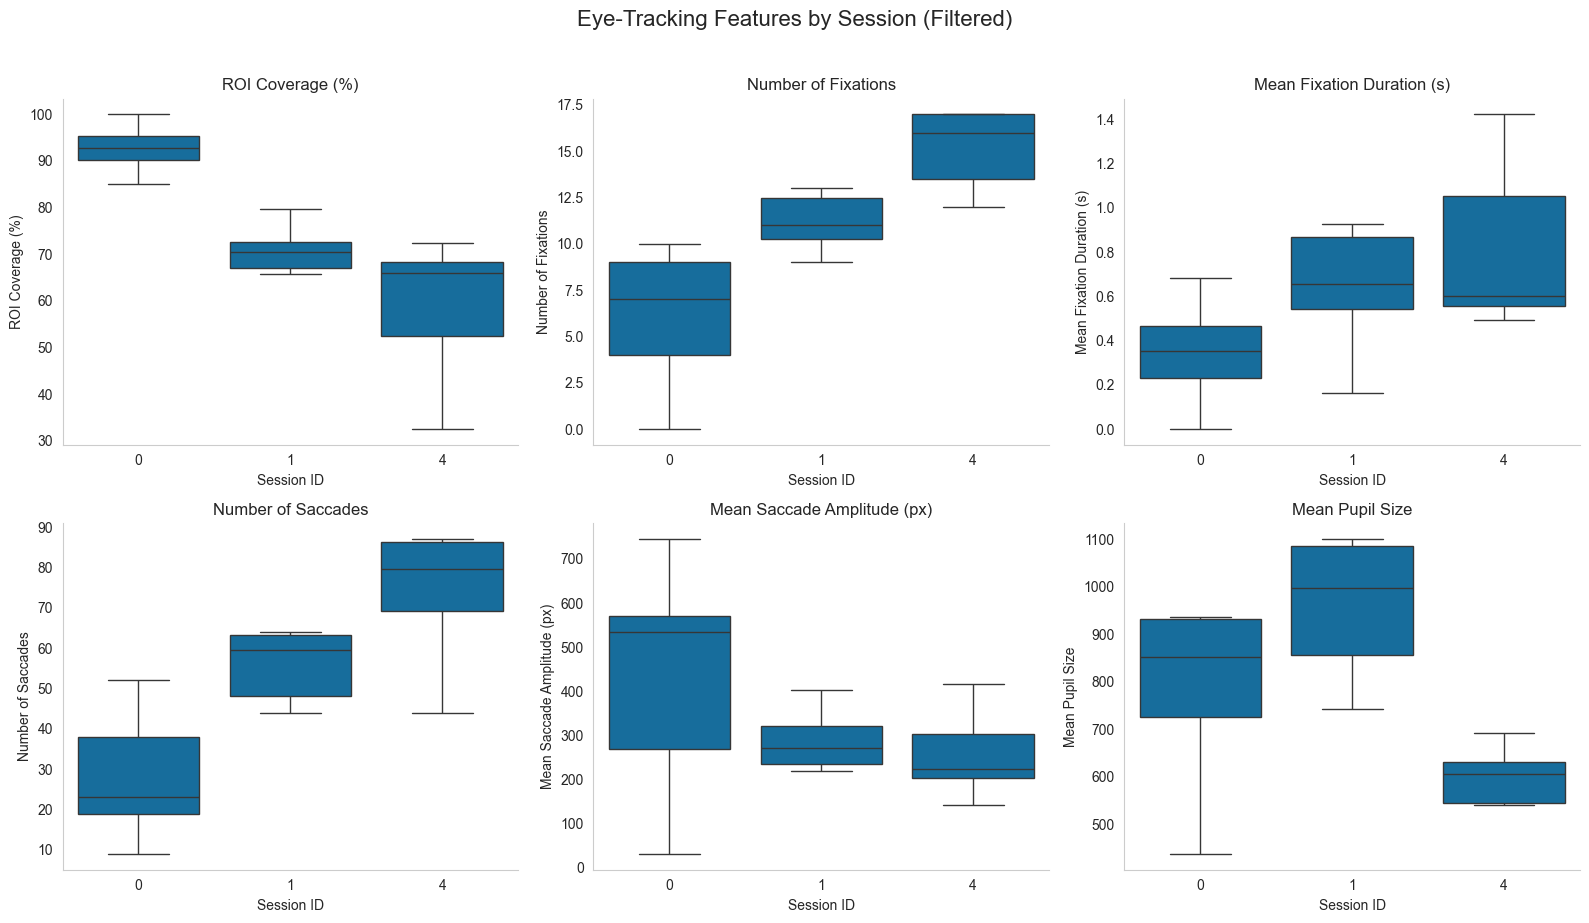

In [ ]:
sns.set_palette("colorblind")
sns.set_style("whitegrid", {"axes.grid": False})

metrics = [
    ("roi_coverage", "ROI Coverage (%)"),
    ("fixation_count", "Number of Fixations"),
    ("fixation_duration_mean", "Mean Fixation Duration (s)"),
    ("saccade_count", "Number of Saccades"),
    ("saccade_amplitude_mean", "Mean Saccade Amplitude (px)"),
    ("pupil_size_mean", "Mean Pupil Size"),
]

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
axes = axes.flatten()

for ax, (col, label) in zip(axes, metrics):
    sns.boxplot(x=filtered['session_id'].astype(str), y=filtered[col], showfliers=False, ax=ax)
    ax.set_xlabel('Session ID')
    ax.set_ylabel(label)
    ax.set_title(label)
    sns.despine(ax=ax)

fig.suptitle('Eye-Tracking Features by Session (Filtered)', fontsize=16, y=1.02)
fig.tight_layout()

# Save figure
output_path = "./figures/eye_tracking_features_by_session_filtered.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved figure to {output_path}")

plt.show()
